In [1]:
import pandas as pd
import numpy as np

In [2]:
import requests
import html5lib
import re

In [3]:
critters = pd.read_csv('critters_chk_final.csv')

In [4]:
listcritters = critters['sci_name3'].tolist()

In [5]:
add_punc = lambda x: x.replace(' ', '_')
listcritters = list(map(add_punc, listcritters))

In [6]:
#crits2 = listcritters.remove('Unknown')
crits2 = [s for s in listcritters if s != 'Unknown']

In [7]:
crits3 = [s for s in crits2 if s != 'Agrias_claudina_sardanapalus']

In [8]:
frog = pd.read_html('https://en.wikipedia.org/wiki/Dryophytes_japonicus')[0]

In [9]:
frog

,Japanese tree frog,Japanese tree frog.1
0,NaN,NaN
1,Conservation status,Conservation status
2,Least Concern (IUCN 3.1)[1],Least Concern (IUCN 3.1)[1]
3,Scientific classification,Scientific classification
4,Kingdom:,Animalia
5,Phylum:,Chordata
6,Class:,Amphibia
7,Order:,Anura
8,Family:,Hylidae
9,Genus:,Dryophytes


In [10]:
frog2 = frog.transpose()

In [11]:
frog2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Japanese tree frog,NaN,Conservation status,Least Concern (IUCN 3.1)[1],Scientific classification,Kingdom:,Phylum:,Class:,Order:,Family:,Genus:,Species:,Binomial name,"Dryophytes japonicus(Günther, 1859)",Synonyms,"Hyla arborea japonica Günther, 1859 Hyla japon..."
Japanese tree frog.1,NaN,Conservation status,Least Concern (IUCN 3.1)[1],Scientific classification,Animalia,Chordata,Amphibia,Anura,Hylidae,Dryophytes,D. japonicus,Binomial name,"Dryophytes japonicus(Günther, 1859)",Synonyms,"Hyla arborea japonica Günther, 1859 Hyla japon..."


In [12]:
red_list3=[]
bad_link3 = [] 
red_list_no_transp = []
for j in crits3:
    base_url_wiki = "https://en.wikipedia.org/wiki/"+str(j)
    response = requests.get(base_url_wiki)
    if response.status_code == 200:
        #continue
        j_red = pd.read_html(base_url_wiki)[0]
        j_red_noT = j_red.copy()
        #red_list_no_transp.append(j_red_noT)
        j_red = j_red.transpose()
        if 'Conservation status' in j_red.values:
            red_list_no_transp.append(j_red_noT)
            j_red['sciname'] = j
            red_list3.append(j_red)
        #elif j_red[2].str.contains('Conservation status').any(): 
        #red_list4.append(j_red)
    else: 
        bad_link3.append(j)
        

In [13]:
red_listdf = pd.concat(red_list3)

In [14]:
red_listdf.shape

(132, 22)

In [15]:
red_listdf

,0,1,2,3,4,5,6,7,8,9,...,12,13,sciname,14,15,16,17,18,19,20
Common bluebottle,NaN,"Resting on a leaf in Uttarakhand, India",Conservation status,Least Concern (IUCN 3.1),Scientific classification,Kingdom:,Phylum:,Class:,Order:,Family:,...,Binomial name,"Graphium sarpedon(Linnaeus, 1758)",Graphium_sarpedon,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Common bluebottle.1,NaN,"Resting on a leaf in Uttarakhand, India",Conservation status,Least Concern (IUCN 3.1),Scientific classification,Animalia,Arthropoda,Insecta,Lepidoptera,Papilionidae,...,Binomial name,"Graphium sarpedon(Linnaeus, 1758)",Graphium_sarpedon,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Small white,NaN,Female,NaN,Male,Conservation status,Secure (NatureServe)[1],Scientific classification,Kingdom:,Phylum:,Class:,...,Genus:,Species:,Pieris_rapae,Binomial name,"Pieris rapae(Linnaeus, 1758)",Synonyms,"Papilio rapae Linnaeus, 1758 Artogeia rapae (L...",NaN,NaN,NaN
Small white.1,NaN,Female,NaN,Male,Conservation status,Secure (NatureServe)[1],Scientific classification,Animalia,Arthropoda,Insecta,...,Pieris,P. rapae,Pieris_rapae,Binomial name,"Pieris rapae(Linnaeus, 1758)",Synonyms,"Papilio rapae Linnaeus, 1758 Artogeia rapae (L...",NaN,NaN,NaN
Ischnura heterosticta,NaN,Male Ischnura heterosticta,NaN,Female Ischnura heterosticta,Conservation status,Least Concern (IUCN 3.1)[1],Scientific classification,Kingdom:,Phylum:,Class:,...,Family:,Genus:,Ischnura_heterosticta,Species:,Binomial name,"Ischnura heterosticta(Burmeister, 1842)[2]",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Whale sharkTemporal range: 28.4–0 Ma[1] PreꞒ Ꞓ O S D C P T J K Pg N.1,NaN,Whale shark in the Andaman Sea around the Simi...,NaN,The size of various whale shark individuals wi...,Conservation status,Endangered (IUCN 3.1)[2],Scientific classification,Animalia,Chordata,Chondrichthyes,...,"RhincodontidaeJ. P. Müller and Henle, 1839[7][5]","RhincodonA. Smith, 1829[6][5]",Rhincodon_typus,R. typus,Binomial name,"Rhincodon typusA. Smith, 1828[3][4][5]",NaN,Range of whale shark[needs update],Synonyms,"Micristodus punctatus Gill, 1865 Rhineodon Den..."
Yellow perch,NaN,Conservation status,Least Concern (IUCN 3.1)[1],Secure (NatureServe)[2],Scientific classification,Kingdom:,Phylum:,Class:,Order:,Family:,...,Binomial name,"Perca flavescens(Mitchill, 1814)",Perca_flavescens,Synonyms[3],"Morone flavescens Mitchill, 1814 Perca fluviat...",NaN,NaN,NaN,NaN,NaN
Yellow perch.1,NaN,Conservation status,Least Concern (IUCN 3.1)[1],Secure (NatureServe)[2],Scientific classification,Animalia,Chordata,Actinopterygii,Perciformes,Percidae,...,Binomial name,"Perca flavescens(Mitchill, 1814)",Perca_flavescens,Synonyms[3],"Morone flavescens Mitchill, 1814 Perca fluviat...",NaN,NaN,NaN,NaN,NaN
Luna lionfish,NaN,Conservation status,Least Concern (IUCN 3.1)[1],Scientific classification,Kingdom:,Phylum:,Class:,Order:,Family:,Genus:,...,"Pterois lunulataTemminck & Schlegel, 1843",NaN,Pterois_lunulata,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
indicies = np.where(red_listdf.values=="Conservation status")

In [17]:
#indicies_binom = np.argwhere(red_listdf.values=="Binomial name")

In [18]:
print(type(indicies))

<class 'tuple'>


In [19]:
#indicies.shape

In [20]:
indicies

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131]),
 array([2, 2, 4, 4, 4, 4, 2, 2, 1, 1, 1, 1, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4,
        1, 1, 2, 2, 4, 4, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 2, 2, 2, 2,

In [21]:
#list1 = list(indicies)

In [22]:
#list1

In [23]:
#tup2 = tuple(list1)

In [24]:
#tup2

In [25]:
second_element = (indicies[0],indicies[1]+1)

In [26]:
second_element

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131]),
 array([3, 3, 5, 5, 5, 5, 3, 3, 2, 2, 2, 2, 3, 3, 5, 5, 3, 3, 3, 3, 5, 5,
        2, 2, 3, 3, 5, 5, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
        3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2,
        2, 2, 3, 3, 3, 3, 3,

In [27]:
#zer = np.zeros_like(indicies)

In [28]:
#zer+np.array([0,1])

In [29]:
#indicies_con_ = indicies + (zer+np.array([0,1]))

In [30]:
arrayconserv =red_listdf.values[second_element]
#redlistdfsci = red_listdf['sciname']

In [31]:
red_list_convdf = pd.DataFrame(arrayconserv, columns=['RL_Category'])

In [32]:
red_list_convdf

,RL_Category
0,Least Concern (IUCN 3.1)
1,Least Concern (IUCN 3.1)
2,Secure (NatureServe)[1]
3,Secure (NatureServe)[1]
4,Least Concern (IUCN 3.1)[1]
...,...
127,Endangered (IUCN 3.1)[2]
128,Least Concern (IUCN 3.1)[1]
129,Least Concern (IUCN 3.1)[1]
130,Least Concern (IUCN 3.1)[1]


In [33]:
scinamecol = red_listdf['sciname'].tolist()

In [34]:
scinamecol

['Graphium_sarpedon',
 'Graphium_sarpedon',
 'Pieris_rapae',
 'Pieris_rapae',
 'Ischnura_heterosticta',
 'Ischnura_heterosticta',
 'Anax_parthenope',
 'Anax_parthenope',
 'Apis_mellifera',
 'Apis_mellifera',
 'Megasoma_elephas',
 'Megasoma_elephas',
 'Locusta_migratoria',
 'Locusta_migratoria',
 'Danaus_plexippus',
 'Danaus_plexippus',
 'Ornithoptera_alexandrae',
 'Ornithoptera_alexandrae',
 'Trogonoptera_brookiana',
 'Trogonoptera_brookiana',
 'Sympetrum_fonscolombii',
 'Sympetrum_fonscolombii',
 'Helix_pomatia',
 'Helix_pomatia',
 'Brachypelma_smithi',
 'Brachypelma_smithi',
 'Papilio_glaucus',
 'Papilio_glaucus',
 'Arapaima_gigas',
 'Arapaima_gigas',
 'Betta_splendens',
 'Betta_splendens',
 'Acheilognathus_melanogaster',
 'Acheilognathus_melanogaster',
 'Makaira_nigricans',
 'Makaira_nigricans',
 'Lepomis_macrochirus',
 'Lepomis_macrochirus',
 'Chaetodon_auripes',
 'Chaetodon_auripes',
 'Cyprinus_carpio',
 'Cyprinus_carpio',
 'Silurus_asotus',
 'Silurus_asotus',
 'Oncorhynchus_masou

In [35]:
redlistdfsci = pd.DataFrame(scinamecol,columns=['sci_name'])

In [36]:
redlistdfsci

,sci_name
0,Graphium_sarpedon
1,Graphium_sarpedon
2,Pieris_rapae
3,Pieris_rapae
4,Ischnura_heterosticta
...,...
127,Rhincodon_typus
128,Perca_flavescens
129,Perca_flavescens
130,Pterois_lunulata


In [37]:
fin_red_concat = pd.concat([redlistdfsci, red_list_convdf], axis=1)

In [38]:
fin_red_concat

,sci_name,RL_Category
0,Graphium_sarpedon,Least Concern (IUCN 3.1)
1,Graphium_sarpedon,Least Concern (IUCN 3.1)
2,Pieris_rapae,Secure (NatureServe)[1]
3,Pieris_rapae,Secure (NatureServe)[1]
4,Ischnura_heterosticta,Least Concern (IUCN 3.1)[1]
...,...,...
127,Rhincodon_typus,Endangered (IUCN 3.1)[2]
128,Perca_flavescens,Least Concern (IUCN 3.1)[1]
129,Perca_flavescens,Least Concern (IUCN 3.1)[1]
130,Pterois_lunulata,Least Concern (IUCN 3.1)[1]


In [39]:
remove_punc = lambda x: x.replace('_', ' ')
fin_red_concat['sci_name3'] = fin_red_concat['sci_name'].apply(lambda x: remove_punc(x))

In [40]:
regex_clean = lambda x: re.sub(r"[\(\[].*?[\)\]]", "", x)
fin_red_concat['Red_List_Category'] = fin_red_concat['RL_Category'].apply(lambda x: regex_clean(x))

In [41]:
fin_red_concat = fin_red_concat.drop_duplicates(subset='sci_name', keep='first')

In [42]:
fin_red_concat.shape

(63, 4)

In [43]:
bad_link3

['Homoeogryllus_japonica',
 'Copris_pecuarius',
 'Phelotrupes_auratus',
 'Photuris_lucicrescens',
 'Allotopus_rosenbergi',
 'Allomyrina_dichotomus_politus',
 'Phyllium_phylliidae',
 'Rhinocerosmuraena_quaesita']

In [44]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [45]:
critters

,Unnamed: 0,Unnamed: 0.1,#,Name_x,Sell,Where/How,Weather,Total Catches to Unlock,Spawn Rates,NH Jan,NH Feb,NH Mar,NH Apr,NH May,NH Jun,NH Jul,NH Aug,NH Sep,NH Oct,NH Nov,NH Dec,SH Jan,SH Feb,SH Mar,SH Apr,SH May,SH Jun,SH Jul,SH Aug,SH Sep,SH Oct,SH Nov,SH Dec,Color 1,Color 2,Icon Filename,Critterpedia Filename,Furniture Filename,Internal ID,Unique Entry ID,Shadow,Rain/Snow Catch Up,Size,Lighting Type,Name2,Name_y,title,sci_name,sci_name2,sci_name3
0,0,0,10,agrias butterfly,3000,Flying near flowers,Any except rain,20,5,NaN,NaN,NaN,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,NaN,NaN,NaN,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,NaN,NaN,NaN,NaN,NaN,NaN,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,Pink,Green,Ins6,InsectMiirotateha,FtrInsectMiirotateha,620,aj95rMzdbSbvZy9A2,NaN,NaN,NaN,NaN,Agrias_Butterfly,Agrias_Butterfly,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Agrias claudina sardanapalus</a>,Agrias claudina sardanapalus
1,1,1,69,ant,80,On rotten turnips,Any weather,0,0,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,Black,White,Ins26,InsectAri,FtrInsectAri,588,QZpmczZu4hW2a4Rpv,NaN,NaN,NaN,NaN,Ant,Ant,['Unknown'],Unknown,Unknown,Unknown
2,2,2,14,Atlas moth,3000,On trees (any kind),Any weather,20,5,NaN,NaN,NaN,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,NaN,NaN,NaN,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,NaN,NaN,NaN,NaN,NaN,NaN,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,Orange,Yellow,Ins10,InsectYonagunisan,FtrInsectYonagunisan,652,u2GhYQJXDCQKp7AQ8,NaN,NaN,NaN,NaN,Atlas_Moth,Atlas_Moth,['Attacus atlas'],Attacus atlas,Attacus atlas,Attacus atlas
3,3,3,68,bagworm,600,Shaking trees (hardwood or cedar only),Any weather,0,50,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,Brown,Blue,Ins36,InsectMinomushi,FtrInsectMinomushi,622,QvxgCm82JqHsDknY4,NaN,NaN,NaN,NaN,Bagworm,Bagworm,['Metura elongatus'],Metura elongatus,Metura elongatus,Metura elongatus
4,4,4,34,banded dragonfly,4500,Flying near water,Any except rain,50,7,NaN,NaN,NaN,NaN,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,NaN,NaN,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,NaN,NaN,NaN,NaN,NaN,NaN,8 AM – 5 PM,8 AM – 5 PM,Black,Yellow,Ins24,InsectOniyanma,FtrInsectOniyanma,635,pCFep58D6QusMSvR7,NaN,NaN,NaN,NaN,Banded_Dragonfly,Banded_Dragonfly,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Anotogaster sieboldii</a>,Anotogaster sieboldii
5,5,5,21,bell cricket,430,On the ground,Any except rain,0,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 PM – 8 AM,5 PM – 8 AM,NaN,NaN,NaN,NaN,5 PM – 8 AM,5 PM – 8 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Black,Beige,Ins31,InsectSuzumushi,FtrInsectSuzumushi,642,d5EQqbQsip82G2CZE,NaN,NaN,NaN,NaN,Bell_Cricket,Bell_Cricket,['Homoeogryllus japonica'],Homoeogryllus japonica,Homoeogryllus japonica,Homoeogryllus japonica
6,6,6,49,blue weevil beetle,800,On palm trees,Any weather,0,2,NaN,NaN,NaN,NaN,NaN,NaN,All day,All day,NaN,NaN,NaN,NaN,All day,All day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Green,Pink,Ins80,InsectHousekizoumushi,FtrInsectHousekizoumushi,3485,qocWy6r5RXjeThdYy,NaN,NaN,NaN,NaN,Blue_Weevil_Beetle,Blue_Weevil_Beetle,['Eupholus magnificus'],Eupholus magnificus,Eupholus magnificus,Eupholus magnificus
7,7,7,26,brown cicada,250,On hardwood/cedar trees,Any weather,0,70,NaN,NaN,NaN,NaN,NaN,NaN,8 AM – 5 PM,8 AM – 5 PM,NaN,NaN,NaN,NaN,8 AM – 5 PM,8 AM – 5 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brown,Green,Ins17,InsectAburazemi,FtrInsectAburazemi,582,gBLRZ2J2R2wwYWFCk,NaN,NaN,NaN,NaN,Brown_Cicada,Brown_Cicada,['Graptopsaltria nigrofuscata'],Graptopsaltria nigrofuscata,Graptopsaltria nigro

In [46]:
critters_w_rl_cat = critters.merge(fin_red_concat,on='sci_name3',how='left')

In [47]:
#Filling every critter with no conservation status listed on their respective wikipedia
#pages by scientific name.  Perhaps the IUCN API would have served better to get more critter
#red list categories filled in, but no way to tell.

In [48]:
critters_w_rl_cat['Red_List_Category'] = critters_w_rl_cat['Red_List_Category'].fillna('Least Concern')

In [49]:
#removing extra whitespace from df

In [50]:
critters_w_rl_cat = critters_w_rl_cat.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [51]:
#Now that we have our final dataframe we can start cleaning it up a bit. Going to fillna
#for all the columns with "".

In [52]:
critters_w_rl_cat = critters_w_rl_cat.fillna('')

In [53]:
critters_w_rl_cat

,Unnamed: 0,Unnamed: 0.1,#,Name_x,Sell,Where/How,Weather,Total Catches to Unlock,Spawn Rates,NH Jan,NH Feb,NH Mar,NH Apr,NH May,NH Jun,NH Jul,NH Aug,NH Sep,NH Oct,NH Nov,NH Dec,SH Jan,SH Feb,SH Mar,SH Apr,SH May,SH Jun,SH Jul,SH Aug,SH Sep,SH Oct,SH Nov,SH Dec,Color 1,Color 2,Icon Filename,Critterpedia Filename,Furniture Filename,Internal ID,Unique Entry ID,Shadow,Rain/Snow Catch Up,Size,Lighting Type,Name2,Name_y,title,sci_name_x,sci_name2,sci_name3,sci_name_y,RL_Category,Red_List_Category
0,0,0,10,agrias butterfly,3000,Flying near flowers,Any except rain,20,5,,,,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,,,,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,,,,,,,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,Pink,Green,Ins6,InsectMiirotateha,FtrInsectMiirotateha,620,aj95rMzdbSbvZy9A2,,,,,Agrias_Butterfly,Agrias_Butterfly,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Agrias claudina sardanapalus</a>,Agrias claudina sardanapalus,,,Least Concern
1,1,1,69,ant,80,On rotten turnips,Any weather,0,0,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,Black,White,Ins26,InsectAri,FtrInsectAri,588,QZpmczZu4hW2a4Rpv,,,,,Ant,Ant,['Unknown'],Unknown,Unknown,Unknown,,,Least Concern
2,2,2,14,Atlas moth,3000,On trees (any kind),Any weather,20,5,,,,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,,,,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,,,,,,,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,Orange,Yellow,Ins10,InsectYonagunisan,FtrInsectYonagunisan,652,u2GhYQJXDCQKp7AQ8,,,,,Atlas_Moth,Atlas_Moth,['Attacus atlas'],Attacus atlas,Attacus atlas,Attacus atlas,,,Least Concern
3,3,3,68,bagworm,600,Shaking trees (hardwood or cedar only),Any weather,0,50,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,Brown,Blue,Ins36,InsectMinomushi,FtrInsectMinomushi,622,QvxgCm82JqHsDknY4,,,,,Bagworm,Bagworm,['Metura elongatus'],Metura elongatus,Metura elongatus,Metura elongatus,,,Least Concern
4,4,4,34,banded dragonfly,4500,Flying near water,Any except rain,50,7,,,,,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,,,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,,,,,,,8 AM – 5 PM,8 AM – 5 PM,Black,Yellow,Ins24,InsectOniyanma,FtrInsectOniyanma,635,pCFep58D6QusMSvR7,,,,,Banded_Dragonfly,Banded_Dragonfly,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Anotogaster sieboldii</a>,Anotogaster sieboldii,,,Least Concern
5,5,5,21,bell cricket,430,On the ground,Any except rain,0,60,,,,,,,,,5 PM – 8 AM,5 PM – 8 AM,,,,,5 PM – 8 AM,5 PM – 8 AM,,,,,,,,,Black,Beige,Ins31,InsectSuzumushi,FtrInsectSuzumushi,642,d5EQqbQsip82G2CZE,,,,,Bell_Cricket,Bell_Cricket,['Homoeogryllus japonica'],Homoeogryllus japonica,Homoeogryllus japonica,Homoeogryllus japonica,,,Least Concern
6,6,6,49,blue weevil beetle,800,On palm trees,Any weather,0,2,,,,,,,All day,All day,,,,,All day,All day,,,,,,,,,,,Green,Pink,Ins80,InsectHousekizoumushi,FtrInsectHousekizoumushi,3485,qocWy6r5RXjeThdYy,,,,,Blue_Weevil_Beetle,Blue_Weevil_Beetle,['Eupholus magnificus'],Eupholus magnificus,Eupholus magnificus,Eupholus magnificus,,,Least Concern
7,7,7,26,brown cicada,250,On hardwood/cedar trees,Any weather,0,70,,,,,,,8 AM – 5 PM,8 AM – 5 PM,,,,,8 AM – 5 PM,8 AM – 5 PM,,,,,,,,,,,Brown,Green,Ins17,InsectAburazemi,FtrInsectAburazemi,582,gBLRZ2J2R2wwYWFCk,,,,,Brown_Cicada,Brown_Cicada,['Graptopsaltria nigrofuscata'],Graptopsaltria nigrofuscata,Graptopsaltria nigrofuscata,Graptopsaltria nigrofuscata,,,Least Concern
8,8,8,77,centipede,300,From hitting rocks,Any weather,0,30,4 PM – 11 PM,4 PM – 11 PM,4 PM – 11 PM,4 PM – 11 PM,4 PM – 11 PM,4 PM – 11 PM,,,4 PM – 11 PM,4 PM – 11 PM,4 PM – 11 PM

In [54]:
#lets add on the iucn category that we got from the api 
iucn_cat_api = pd.read_csv('cat_from_iucn.csv')

In [55]:
iucn_cat_api = iucn_cat_api.drop("Unnamed: 0", axis = 1)

In [56]:
critters_w_cat_2 = critters_w_rl_cat.merge(iucn_cat_api,left_on='sci_name3',right_on="Sci name",how='left')

In [57]:
critters_w_cat_2

,Unnamed: 0,Unnamed: 0.1,#,Name_x,Sell,Where/How,Weather,Total Catches to Unlock,Spawn Rates,NH Jan,NH Feb,NH Mar,NH Apr,NH May,NH Jun,NH Jul,NH Aug,NH Sep,NH Oct,NH Nov,NH Dec,SH Jan,SH Feb,SH Mar,SH Apr,SH May,SH Jun,SH Jul,SH Aug,SH Sep,SH Oct,SH Nov,SH Dec,Color 1,Color 2,Icon Filename,Critterpedia Filename,Furniture Filename,Internal ID,Unique Entry ID,Shadow,Rain/Snow Catch Up,Size,Lighting Type,Name2,Name_y,title,sci_name_x,sci_name2,sci_name3,sci_name_y,RL_Category,Red_List_Category,IUCN_cat,Sci name
0,0,0,10,agrias butterfly,3000,Flying near flowers,Any except rain,20,5,,,,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,,,,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,,,,,,,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,Pink,Green,Ins6,InsectMiirotateha,FtrInsectMiirotateha,620,aj95rMzdbSbvZy9A2,,,,,Agrias_Butterfly,Agrias_Butterfly,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Agrias claudina sardanapalus</a>,Agrias claudina sardanapalus,,,Least Concern,NaN,NaN
1,1,1,69,ant,80,On rotten turnips,Any weather,0,0,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,Black,White,Ins26,InsectAri,FtrInsectAri,588,QZpmczZu4hW2a4Rpv,,,,,Ant,Ant,['Unknown'],Unknown,Unknown,Unknown,,,Least Concern,NaN,NaN
2,2,2,14,Atlas moth,3000,On trees (any kind),Any weather,20,5,,,,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,,,,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,,,,,,,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,Orange,Yellow,Ins10,InsectYonagunisan,FtrInsectYonagunisan,652,u2GhYQJXDCQKp7AQ8,,,,,Atlas_Moth,Atlas_Moth,['Attacus atlas'],Attacus atlas,Attacus atlas,Attacus atlas,,,Least Concern,NaN,NaN
3,3,3,68,bagworm,600,Shaking trees (hardwood or cedar only),Any weather,0,50,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,Brown,Blue,Ins36,InsectMinomushi,FtrInsectMinomushi,622,QvxgCm82JqHsDknY4,,,,,Bagworm,Bagworm,['Metura elongatus'],Metura elongatus,Metura elongatus,Metura elongatus,,,Least Concern,NaN,NaN
4,4,4,34,banded dragonfly,4500,Flying near water,Any except rain,50,7,,,,,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,,,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,,,,,,,8 AM – 5 PM,8 AM – 5 PM,Black,Yellow,Ins24,InsectOniyanma,FtrInsectOniyanma,635,pCFep58D6QusMSvR7,,,,,Banded_Dragonfly,Banded_Dragonfly,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Anotogaster sieboldii</a>,Anotogaster sieboldii,,,Least Concern,LC,Anotogaster sieboldii
5,5,5,21,bell cricket,430,On the ground,Any except rain,0,60,,,,,,,,,5 PM – 8 AM,5 PM – 8 AM,,,,,5 PM – 8 AM,5 PM – 8 AM,,,,,,,,,Black,Beige,Ins31,InsectSuzumushi,FtrInsectSuzumushi,642,d5EQqbQsip82G2CZE,,,,,Bell_Cricket,Bell_Cricket,['Homoeogryllus japonica'],Homoeogryllus japonica,Homoeogryllus japonica,Homoeogryllus japonica,,,Least Concern,NaN,NaN
6,6,6,49,blue weevil beetle,800,On palm trees,Any weather,0,2,,,,,,,All day,All day,,,,,All day,All day,,,,,,,,,,,Green,Pink,Ins80,InsectHousekizoumushi,FtrInsectHousekizoumushi,3485,qocWy6r5RXjeThdYy,,,,,Blue_Weevil_Beetle,Blue_Weevil_Beetle,['Eupholus magnificus'],Eupholus magnificus,Eupholus magnificus,Eupholus magnificus,,,Least Concern,NaN,NaN
7,7,7,26,brown cicada,250,On hardwood/cedar trees,Any weather,0,70,,,,,,,8 AM – 5 PM,8 AM – 5 PM,,,,,8 AM – 5 PM,8 AM – 5 PM,,,,,,,,,,,Brown,Green,Ins17,InsectAburazemi,FtrInsectAburazemi,582,gBLRZ2J2R2wwYWFCk,,,,,Brown_Cicada,Brown_Cicada,['Graptopsaltria nigrofuscata'],Graptopsaltria nigrofuscata,Graptopsaltria nigrofuscata,Graptopsaltria nigrofuscata,,,Least Concern,NaN,NaN
8,8,8,77,centipede,300,From hitting rocks,Any weather,0,30,4 PM – 11 PM,4 PM –

In [58]:
critters_describe = critters_w_rl_cat.groupby(['Red_List_Category'])['Sell'].describe().reset_index()

In [59]:
critters_describe = critters_describe.round(0)

In [60]:
critters_describe = critters_describe.sort_values('mean',ascending = False)

In [61]:
critters_describe = critters_describe.rename(columns={"mean": "Mean Sell Price",
                                            "count":"Count per Category"
                                                     })

In [62]:
critters_describe = critters_describe.fillna(0)

In [63]:
critters_describe

,Red_List_Category,Count per Category,Mean Sell Price,std,min,25%,50%,75%,max
1,Critically Imperiled,1.0,15000.0,0.0,15000.0,15000.0,15000.0,15000.0,15000.0
0,Critically Endangered,3.0,12667.0,4041.0,8000.0,11500.0,15000.0,15000.0,15000.0
3,Endangered,4.0,7000.0,5477.0,1000.0,3250.0,7000.0,10750.0,13000.0
8,Vulnerable,6.0,5450.0,5830.0,300.0,1300.0,3250.0,8500.0,15000.0
5,Near Threatened,6.0,4715.0,4211.0,140.0,862.0,5000.0,7750.0,10000.0
2,Data Deficient,4.0,3050.0,4649.0,200.0,725.0,1000.0,3325.0,10000.0
4,Least Concern,133.0,2421.0,3331.0,10.0,300.0,800.0,3000.0,15000.0
6,Not evaluated,1.0,650.0,0.0,650.0,650.0,650.0,650.0,650.0
7,Secure,2.0,200.0,57.0,160.0,180.0,200.0,220.0,240.0


In [64]:
orderbox = critters_describe['Red_List_Category'].tolist()

In [65]:
import seaborn as sns

In [66]:
sns.set(rc={'figure.figsize':(14,12)})
sns.set_style("whitegrid")
import matplotlib as plt

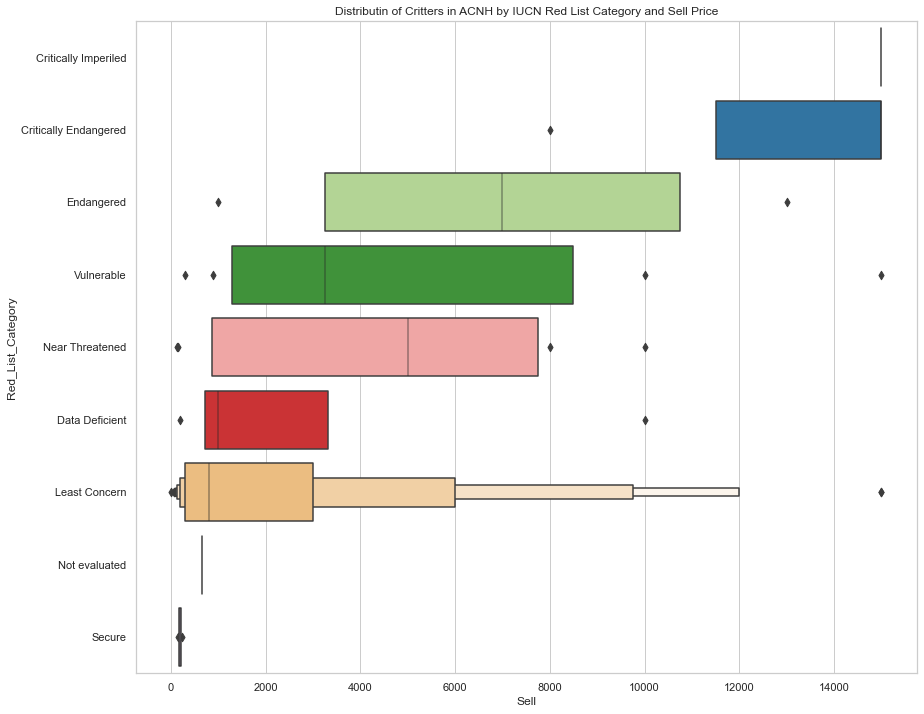

In [67]:
ax = sns.boxenplot(x="Sell", y="Red_List_Category", data=critters_w_rl_cat, orient="h", 
                 order = orderbox, palette ="Paired").set(title ="Distributin of Critters in ACNH by IUCN Red List Category and Sell Price")
#ax.sns.title("Distributin of Critters in ACNH by IUCN Red List Category and Sell Price")
#ax = sns.swarmplot(x="Red_List_Category", y="Sell", data=critters_w_rl_cat, color=".25")

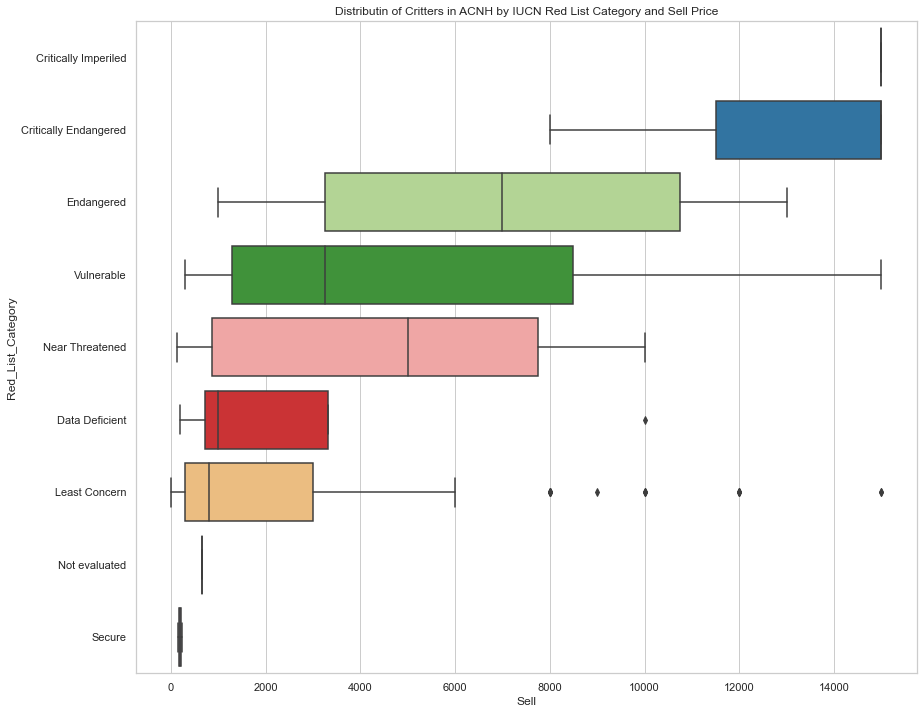

In [68]:
ax3 = sns.boxplot(x="Sell", y="Red_List_Category", data=critters_w_rl_cat, orient="h", 
                 order = orderbox, palette ="Paired").set(title="Distributin of Critters in ACNH by IUCN Red List Category and Sell Price")

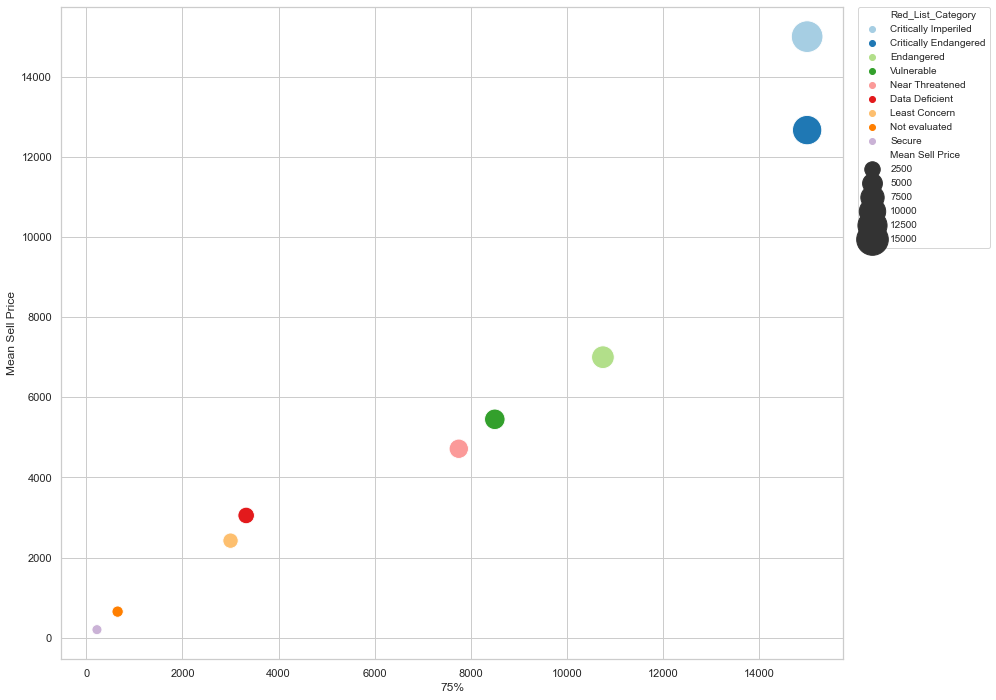

In [69]:
ax3 = sns.scatterplot(
    data=critters_describe, x="75%", y="Mean Sell Price", hue='Red_List_Category', size="Mean Sell Price",
    sizes=(100, 1000),legend="brief",palette = 'Paired'
).legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='10')

In [70]:
critters_w_rl_cat = critters_w_rl_cat.sort_values('Sell',ascending = False)

In [71]:
top20sell = critters_w_rl_cat[0:30]

In [72]:
top20sell

,Unnamed: 0,Unnamed: 0.1,#,Name_x,Sell,Where/How,Weather,Total Catches to Unlock,Spawn Rates,NH Jan,NH Feb,NH Mar,NH Apr,NH May,NH Jun,NH Jul,NH Aug,NH Sep,NH Oct,NH Nov,NH Dec,SH Jan,SH Feb,SH Mar,SH Apr,SH May,SH Jun,SH Jul,SH Aug,SH Sep,SH Oct,SH Nov,SH Dec,Color 1,Color 2,Icon Filename,Critterpedia Filename,Furniture Filename,Internal ID,Unique Entry ID,Shadow,Rain/Snow Catch Up,Size,Lighting Type,Name2,Name_y,title,sci_name_x,sci_name2,sci_name3,sci_name_y,RL_Category,Red_List_Category
85,85,85,79,barreleye,15000,Sea,,100,1,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,Black,Black,Fish84,FishDemenigisu,FtrFishDemenigisu,4204,BpqTa4zmTjv3Nm4wE,Small,No,1x1,Fluorescent,Barreleye,Barreleye,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Macropinna microstoma</a>,Macropinna microstoma,,,Least Concern
103,103,103,42,dorado,15000,River,,100,1–2,,,,,,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,,,,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,,,,,,,,,4 AM – 9 PM,Yellow,Black,Fish34,FishDolado,FtrFishDolado,2251,G7ZwD67cRMHBwTSKH,X-Large,No,2x1,Fluorescent,Dorado,Dorado,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Salminus brasiliensis</a>,Salminus brasiliensis,,,Least Concern
149,149,149,30,stringfish,15000,River (clifftop),,100,1,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,,,,,,4 PM – 9 AM,,,,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,Brown,Black,Fish26,FishItou,FtrFishItou,2241,APXg8kSzjcmoGGWSP,X-Large,No,2x1,Fluorescent,Stringfish,Stringfish,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Parahucho perryi</a>,Parahucho perryi,Parahucho_perryi,Critically Endangered (IUCN 3.1)[1],Critically Endangered
110,110,110,29,golden trout,15000,River (clifftop),,100,1,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,Brown,Black,Fish79,FishGoldenTorauto,FtrFishGoldenTorauto,4193,wwGzR7FzWNJ7cDz9X,Medium,No,1x1,Fluorescent,Golden_Trout,Golden_Trout,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Oncorhynchus aguabonita</a>,Oncorhynchus aguabonita,Oncorhynchus_aguabonita,Critically Imperiled (NatureServe),Critically Imperiled
112,112,112,74,great white shark,15000,Sea,,50,2,,,,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,,,,,,4 PM – 9 AM,Blue,Blue,Fish62,FishSame,FtrFishSame,2280,EPypAeJGuTDGFJRnx,Large w/Fin,Yes,3x2,No lighting,Great_White_Shark,Great_White_Shark,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Carcharodon carcharias</a>,Carcharodon carcharias,Carcharodon_carcharias,Vulnerable (IUCN 3.1)[1],Vulnerable
98,98,98,80,coelacanth,15000,Sea (rainy days),,100,1–2,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,Black,Black,Fish63,FishSirakansu,FtrFishSirakansu,2284,NjMZQ6Xi9NswEXnHH,XX-Large,Yes,2x1,Fluorescent,Coelacanth,Coelacanth,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Latimeria chalumnae</a>,Latimeria chalumnae,Latimeria_chalumnae,Critically Endangered (IUCN 2.3)[2],Critically Endangered
157,157,157,75,whale shark,13000,Sea,,50,1,,,,,,All day,All day,All day,All day,,,,All day,All day,All day,,,,,,,,,All day,Black,Blue,Fish72,FishJinbeezame,FtrFishJinbee,2282,r3RAtJsXENwnFvQh7,Large w/Fin,Yes,3x2,No lighting,Whale_Shar

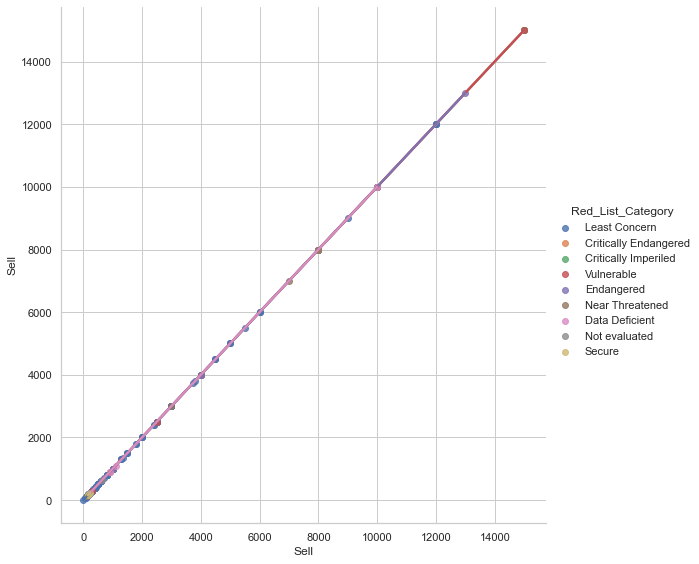

In [73]:
g = sns.lmplot(x="Sell", y="Sell", hue="Red_List_Category", height=8,data=critters_w_rl_cat)
sns.set(rc={'figure.figsize':(18,12)})

In [74]:
localsofcritters = critters_w_rl_cat['Where/How'].tolist()

In [75]:
localsofcritters = np.unique(localsofcritters)

In [76]:
localsofcritters

array(['Disguised on shoreline', 'Disguised under trees', 'Flying',
       'Flying near blue/purple/black flowers', 'Flying near flowers',
       'Flying near light sources',
       'Flying near trash (boots, tires, cans) or rotten turnips',
       'Flying near water', 'From hitting rocks', 'On beach rocks',
       'On flowers', 'On hardwood/cedar trees', 'On palm trees',
       'On rivers/ponds', 'On rocks/bushes', 'On rotten turnips',
       'On the ground', 'On tree stumps', 'On trees (any kind)',
       'On villagers', 'On white flowers', 'Pier', 'Pond',
       'Pushing snowballs', 'River', 'River (clifftop)', 'River (mouth)',
       'Sea', 'Sea (rainy days)', 'Shaking trees',
       'Shaking trees (hardwood or cedar only)',
       'Underground (dig where noise is loudest)'], dtype='<U56')

In [77]:
options = {'On trees (any kind)':'Found on/in Trees', 'On tree stumps' :'Found on/in Trees',
           'On hardwood/cedar trees':'Found on/in Trees','On palm trees':'Found on/in Trees',
           'Shaking trees (hardwood or cedar only)':'Found on/in Trees','Shaking trees':'Found on/in Trees',
           'River':'Found on/in Rivers or Pond','River (clifftop)':'Found on/in Rivers or Pond',
           'River (mouth)' :'Found on/in Rivers or Pond','Pond':'Found on/in Rivers or Pond',
           'On rivers/ponds':'Found on/in Rivers or Pond','Pond':'Found on/in Rivers or Pond',
           'Flying near light sources':'Flying','Flying':'Flying',
           'Flying near blue/purple/black flowers':'Flying','Flying near flowers':'Flying',
           'Flying near water':'Flying','Flying near trash (boots, tires, cans) or rotten turnips':'Flying',
           'On beach rocks':'Found on something','On flowers':'Found on something',
           'On rocks/bushes':'Found on something','On rotten turnips' :'Found on something',
           'On the ground' :'Found on something', 'On villagers' :'Found on something',
           'On white flowers' :'Found on something','Pushing snowballs':'Found on something',
           'Disguised on shoreline':'Disguised','Disguised under trees':'Disguised',
           'Underground (dig where noise is loudest)':'Underground',
           'Sea':'Ocean Sea', 'Sea (rainy days)':'Ocean Sea', 'Pier':'Ocean Sea',
           'From hitting rocks':'Found on something'}
           


In [78]:
critters_w_rl_cat['Where Found'] = critters_w_rl_cat['Where/How'].apply (lambda x: options.get(x,"Not Found"))

In [79]:
critters_w_rl_cat

,Unnamed: 0,Unnamed: 0.1,#,Name_x,Sell,Where/How,Weather,Total Catches to Unlock,Spawn Rates,NH Jan,NH Feb,NH Mar,NH Apr,NH May,NH Jun,NH Jul,NH Aug,NH Sep,NH Oct,NH Nov,NH Dec,SH Jan,SH Feb,SH Mar,SH Apr,SH May,SH Jun,SH Jul,SH Aug,SH Sep,SH Oct,SH Nov,SH Dec,Color 1,Color 2,Icon Filename,Critterpedia Filename,Furniture Filename,Internal ID,Unique Entry ID,Shadow,Rain/Snow Catch Up,Size,Lighting Type,Name2,Name_y,title,sci_name_x,sci_name2,sci_name3,sci_name_y,RL_Category,Red_List_Category,Where Found
85,85,85,79,barreleye,15000,Sea,,100,1,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,Black,Black,Fish84,FishDemenigisu,FtrFishDemenigisu,4204,BpqTa4zmTjv3Nm4wE,Small,No,1x1,Fluorescent,Barreleye,Barreleye,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Macropinna microstoma</a>,Macropinna microstoma,,,Least Concern,Ocean Sea
103,103,103,42,dorado,15000,River,,100,1–2,,,,,,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,,,,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,,,,,,,,,4 AM – 9 PM,Yellow,Black,Fish34,FishDolado,FtrFishDolado,2251,G7ZwD67cRMHBwTSKH,X-Large,No,2x1,Fluorescent,Dorado,Dorado,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Salminus brasiliensis</a>,Salminus brasiliensis,,,Least Concern,Found on/in Rivers or Pond
149,149,149,30,stringfish,15000,River (clifftop),,100,1,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,,,,,,4 PM – 9 AM,,,,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,Brown,Black,Fish26,FishItou,FtrFishItou,2241,APXg8kSzjcmoGGWSP,X-Large,No,2x1,Fluorescent,Stringfish,Stringfish,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Parahucho perryi</a>,Parahucho perryi,Parahucho_perryi,Critically Endangered (IUCN 3.1)[1],Critically Endangered,Found on/in Rivers or Pond
110,110,110,29,golden trout,15000,River (clifftop),,100,1,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,Brown,Black,Fish79,FishGoldenTorauto,FtrFishGoldenTorauto,4193,wwGzR7FzWNJ7cDz9X,Medium,No,1x1,Fluorescent,Golden_Trout,Golden_Trout,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Oncorhynchus aguabonita</a>,Oncorhynchus aguabonita,Oncorhynchus_aguabonita,Critically Imperiled (NatureServe),Critically Imperiled,Found on/in Rivers or Pond
112,112,112,74,great white shark,15000,Sea,,50,2,,,,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,,,,,,4 PM – 9 AM,Blue,Blue,Fish62,FishSame,FtrFishSame,2280,EPypAeJGuTDGFJRnx,Large w/Fin,Yes,3x2,No lighting,Great_White_Shark,Great_White_Shark,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Carcharodon carcharias</a>,Carcharodon carcharias,Carcharodon_carcharias,Vulnerable (IUCN 3.1)[1],Vulnerable,Ocean Sea
98,98,98,80,coelacanth,15000,Sea (rainy days),,100,1–2,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,Black,Black,Fish63,FishSirakansu,FtrFishSirakansu,2284,NjMZQ6Xi9NswEXnHH,XX-Large,Yes,2x1,Fluorescent,Coelacanth,Coelacanth,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Latimeria chalumnae</a>,Latimeria chalumnae,Latimeria_chalumnae,Critically Endangered (IUCN 2.3)[2],Critically Endangered,Ocean Sea
157,157,157,75,whale shark,13000,Sea,,50,1,,,,,,All day,All day,All day,All day,,,,All day,All day,All day,,,,,,

In [80]:
local_c_cat =critters_w_rl_cat.groupby(by=['Where Found','Red_List_Category'])['Sell'].agg(['count',
                                                                                           'median',
                                                                                           'mean',
                                                                                           'std',
                                                                                           'max',
                                                                                           'min',
                                                                                           ]).reset_index()

In [81]:
local_c_cat

,Where Found,Red_List_Category,count,median,mean,std,max,min
0,Disguised,Least Concern,2,800.0,800.000000,282.842712,1000,600
1,Flying,Data Deficient,1,200.0,200.000000,NaN,200,200
2,Flying,Endangered,1,4000.0,4000.000000,NaN,4000,4000
3,Flying,Least Concern,17,500.0,1470.000000,1537.916610,4500,60
4,Flying,Near Threatened,1,140.0,140.000000,NaN,140,140
5,Flying,Secure,2,200.0,200.000000,56.568542,240,160
6,Found on something,Least Concern,21,300.0,953.333333,1793.143422,8000,70
7,Found on something,Near Threatened,1,8000.0,8000.000000,NaN,8000,8000
8,Found on/in Rivers or Pond,Critically Endangered,1,15000.0,15000.000000,NaN,15000,15000
9,Found on/in Rivers or Pond,Critically Imperiled,1,15000.0,15000.000000,NaN,15000,15000


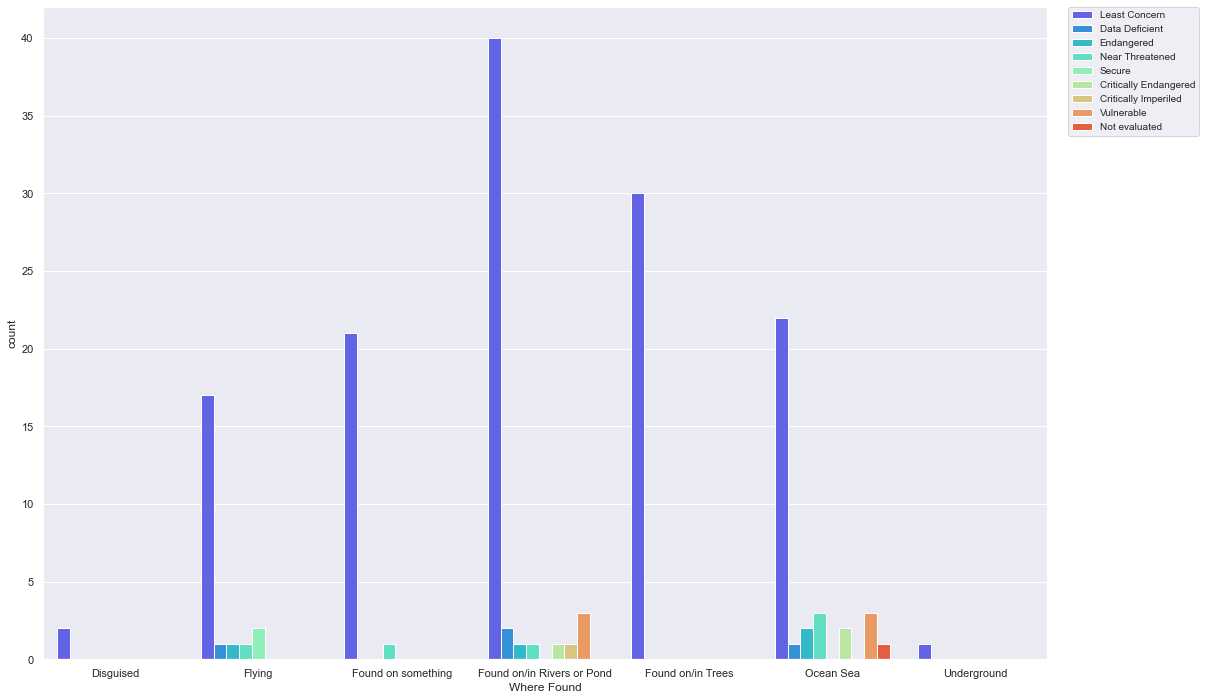

In [82]:
l = sns.barplot(x='Where Found',y='count',data=local_c_cat, 
                palette='rainbow', hue='Red_List_Category',ci=None).legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='10')
#l.set_xticklabels(l.get_xticklabels(),rotation = 90)
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='10')
#plt.title("Critters by catch locations and IUCN Red List Category Type and Sell Price")

In [83]:
red_list_order = ['Least Concern','Not evaluated','Secure','Data Deficient','Vulnerable',
                 'Near Threatened','Endangered','Critically Endangered','Critically Imperiled']

In [84]:
import altair as alt

alt.Chart(local_c_cat).mark_bar().encode(
    x= 'median:Q',
    y=alt.Y('Where Found:N',sort=red_list_order),
    color=alt.Color('Red_List_Category:N',sort=red_list_order)
    #column='site:N'
)

alt.Chart(...)

In [122]:
import plotly.express as px
import numpy as np
fig = px.treemap(local_c_cat, path=[px.Constant("Where Found"),'Where Found','Red_List_Category'], values='median',
                  color='median',
                  color_continuous_scale='tealrose',
                  #color_discrete_sequence=px.colors.qualitative.Pastel,
                  title ='Critters habitats by Red List Category and Mean Sell Value')
                  
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [86]:
alt.Chart(local_c_cat).mark_bar().encode(
    x= 'sum(count):Q',
    y= alt.Y('Where Found:N',sort=alt.SortArray(['Least Concern','Not evaluated','Secure','Data Deficient','Vulnerable',
                 'Near Threatened','Endangered','Critically Endangered','Critically Imperiled'])),
    color=alt.Color('Red_List_Category:N',sort = red_list_order)
    #column='site:N'
)

alt.Chart(...)

In [87]:
#Also need make a visual with the dollar sell group by counts and red list category and then the deeper correlation between price of species and if it's correlated to being endangered

#Then the acp poll monthly results times series and the lollipop chart by most popular villagers along with the chart comparing the most pop villagers to most pop acp poll villagers

#And something else with the location of where species are found (I started this one and got sidetracked)

In [88]:
from sklearn.preprocessing import LabelEncoder

In [89]:
critters_sell_iucn = critters_w_rl_cat[['Red_List_Category','Sell']].copy().reset_index()

In [90]:
red_list_grade_dict = {"Critically Imperiled":9,"Critically Endangered":8,
                       "Endangered":7,"Vulnerable":6,
                       "Near Threatened":5,"Data Deficient":4,
                        "Least Concern":3, "Not evaluated":2,
                       "Secure":1}

In [91]:
critters_sell_iucn['Red_List_Grade'] = critters_sell_iucn['Red_List_Category'].apply(lambda x:red_list_grade_dict[x] )

In [92]:
critters_sell_iucn

,index,Red_List_Category,Sell,Red_List_Grade
0,85,Least Concern,15000,3
1,103,Least Concern,15000,3
2,149,Critically Endangered,15000,8
3,110,Critically Imperiled,15000,9
4,112,Vulnerable,15000,6
5,98,Critically Endangered,15000,8
6,157,Endangered,13000,7
7,30,Least Concern,12000,3
8,29,Least Concern,12000,3
9,142,Least Concern,12000,3


In [93]:
#critters_sell_iucn['Red_List_Cat_Grade'] =critters_sell_iucn['Red_List_Category'].astype('category').cat.codes

In [94]:
critters_sell_iucn = critters_sell_iucn.drop(columns = "index")

In [95]:
critters_sell_iucn.corr()

,Sell,Red_List_Grade
Sell,1.000000,0.464954
Red_List_Grade,0.464954,1.000000


In [96]:
#label_encoder = LabelEncoder()
#critters_sell_iucn['Red_List_Category'] = label_encoder.fit_transform(critters_sell_iucn['Red_List_Category'])
  
# Create correlation matrix
corr_mat = critters_sell_iucn.corr(method='pearson')
  
# Convert correlation matrix to 1-D Series and sort
sorted_mat = corr_mat.unstack().sort_values()

In [97]:
sorted_mat

Sell            Red_List_Grade    0.464954
Red_List_Grade  Sell              0.464954
Sell            Sell              1.000000
Red_List_Grade  Red_List_Grade    1.000000
dtype: float64

In [98]:
corr_mat

,Sell,Red_List_Grade
Sell,1.000000,0.464954
Red_List_Grade,0.464954,1.000000


In [99]:
#so there is no correlation between the sell price and the red list category 
# going to try on smaller table just to double check


In [100]:
critters_describe['Red_List_Category'] =critters_describe['Red_List_Category'].astype('category').cat.codes

In [101]:
critters_describe.corr()

,Red_List_Category,Count per Category,Mean Sell Price,std,min,25%,50%,75%,max
Red_List_Category,1.000000,0.011609,-0.713676,-0.061518,-0.657362,-0.724699,-0.723764,-0.629404,-0.500194
Count per Category,0.011609,1.000000,-0.243049,0.078721,-0.223325,-0.251417,-0.293494,-0.267098,0.301938
Mean Sell Price,-0.713676,-0.243049,1.000000,0.066473,0.893526,0.950317,0.977542,0.963865,0.680939
std,-0.061518,0.078721,0.066473,1.000000,-0.367921,-0.222844,-0.005178,0.276448,0.604742
min,-0.657362,-0.223325,0.893526,-0.367921,1.000000,0.976661,0.881856,0.749871,0.400794
25%,-0.724699,-0.251417,0.950317,-0.222844,0.976661,1.000000,0.954173,0.844099,0.479902
50%,-0.723764,-0.293494,0.977542,-0.005178,0.881856,0.954173,1.000000,0.945527,0.568570
75%,-0.629404,-0.267098,0.963865,0.276448,0.749871,0.844099,0.945527,1.000000,0.741389
max,-0.500194,0.301938,0.680939,0.604742,0.400794,0.479902,0.568570,0.741389,1.000000


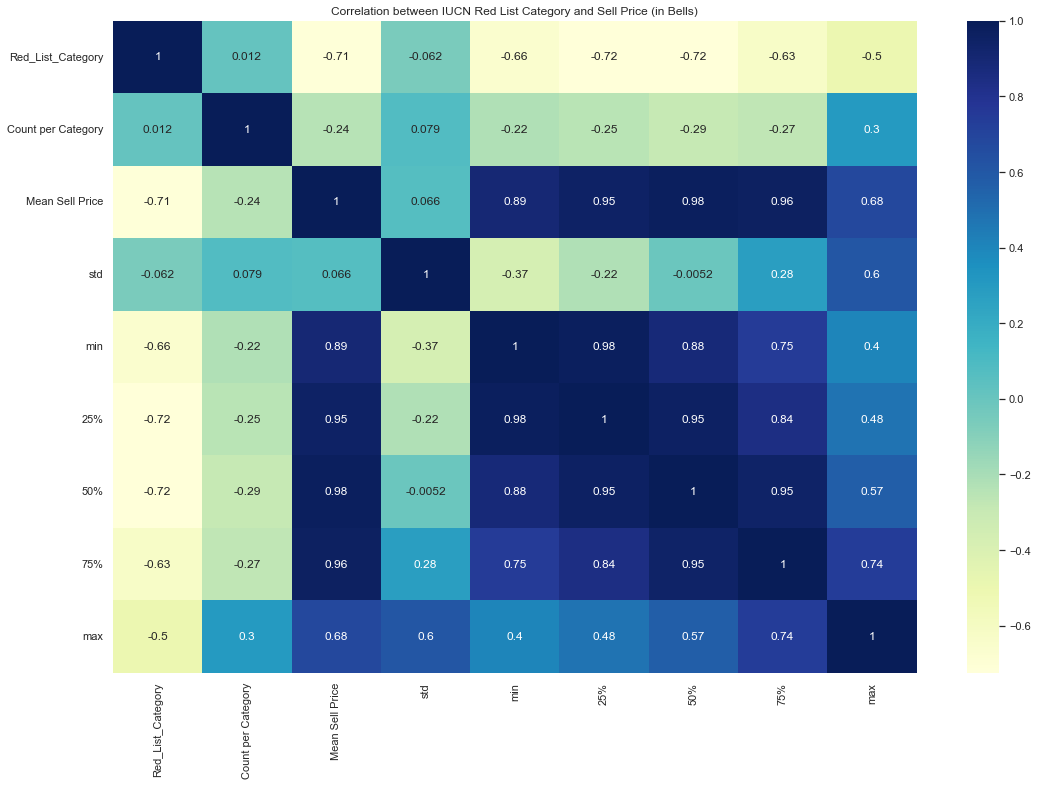

In [102]:
dataplot = sns.heatmap(critters_describe.corr(), cmap="YlGnBu", annot=True).set(title = "Correlation between IUCN Red List Category and Sell Price (in Bells)")

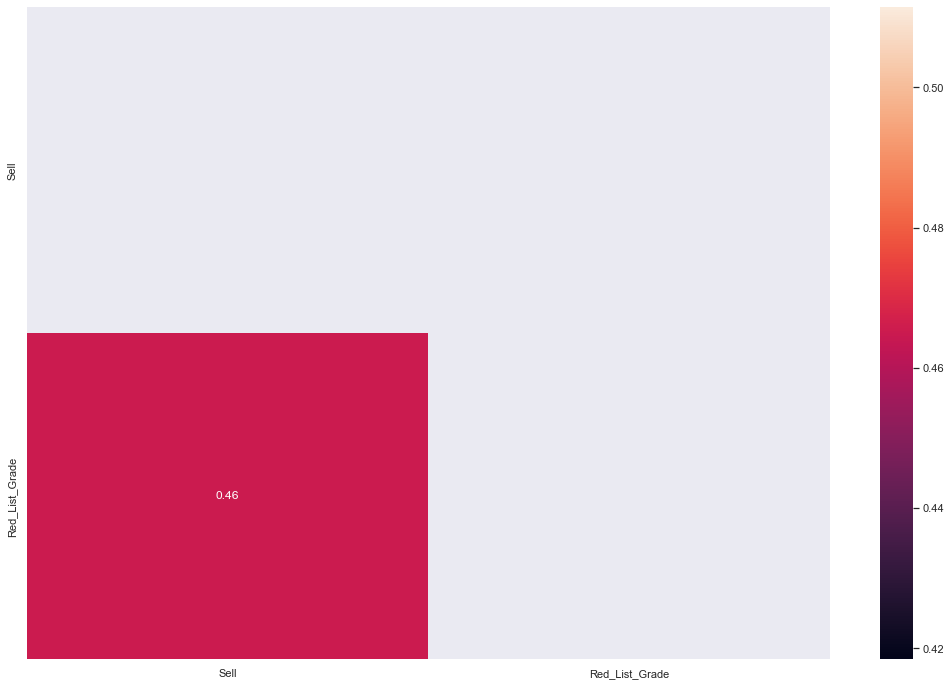

In [107]:
# applying mask
mask = np.triu(np.ones_like(critters_sell_iucn.corr()))
 
# plotting a triangle correlation heatmap
dataplot2 = sns.heatmap(critters_sell_iucn.corr(), mask=mask, annot = True)

In [123]:
critters_w_rl_cat_fin = critters_w_rl_cat[critters_w_rl_cat['Red_List_Category']!='Least Concern']

In [129]:
critters_w_rl_cat_fin = critters_w_rl_cat_fin[critters_w_rl_cat_fin['Red_List_Category']!='Not evaluated']

In [130]:
critters_w_rl_cat_fin3 = critters_w_rl_cat_fin[critters_w_rl_cat_fin['Red_List_Category']!='Secure']

In [132]:
critters_w_rl_cat_fin4 = critters_w_rl_cat_fin3[critters_w_rl_cat_fin3['Red_List_Category']!='Secure']

In [133]:
critters_w_rl_cat_fin4

,Unnamed: 0,Unnamed: 0.1,#,Name_x,Sell,Where/How,Weather,Total Catches to Unlock,Spawn Rates,NH Jan,NH Feb,NH Mar,NH Apr,NH May,NH Jun,NH Jul,NH Aug,NH Sep,NH Oct,NH Nov,NH Dec,SH Jan,SH Feb,SH Mar,SH Apr,SH May,SH Jun,SH Jul,SH Aug,SH Sep,SH Oct,SH Nov,SH Dec,Color 1,Color 2,Icon Filename,Critterpedia Filename,Furniture Filename,Internal ID,Unique Entry ID,Shadow,Rain/Snow Catch Up,Size,Lighting Type,Name2,Name_y,title,sci_name_x,sci_name2,sci_name3,sci_name_y,RL_Category,Red_List_Category,Where Found
149,149,149,30,stringfish,15000,River (clifftop),,100,1,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,,,,,,4 PM – 9 AM,,,,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,Brown,Black,Fish26,FishItou,FtrFishItou,2241,APXg8kSzjcmoGGWSP,X-Large,No,2x1,Fluorescent,Stringfish,Stringfish,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Parahucho perryi</a>,Parahucho perryi,Parahucho_perryi,Critically Endangered (IUCN 3.1)[1],Critically Endangered,Found on/in Rivers or Pond
110,110,110,29,golden trout,15000,River (clifftop),,100,1,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,Brown,Black,Fish79,FishGoldenTorauto,FtrFishGoldenTorauto,4193,wwGzR7FzWNJ7cDz9X,Medium,No,1x1,Fluorescent,Golden_Trout,Golden_Trout,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Oncorhynchus aguabonita</a>,Oncorhynchus aguabonita,Oncorhynchus_aguabonita,Critically Imperiled (NatureServe),Critically Imperiled,Found on/in Rivers or Pond
112,112,112,74,great white shark,15000,Sea,,50,2,,,,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,,,,,,4 PM – 9 AM,Blue,Blue,Fish62,FishSame,FtrFishSame,2280,EPypAeJGuTDGFJRnx,Large w/Fin,Yes,3x2,No lighting,Great_White_Shark,Great_White_Shark,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Carcharodon carcharias</a>,Carcharodon carcharias,Carcharodon_carcharias,Vulnerable (IUCN 3.1)[1],Vulnerable,Ocean Sea
98,98,98,80,coelacanth,15000,Sea (rainy days),,100,1–2,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,Black,Black,Fish63,FishSirakansu,FtrFishSirakansu,2284,NjMZQ6Xi9NswEXnHH,XX-Large,Yes,2x1,Fluorescent,Coelacanth,Coelacanth,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Latimeria chalumnae</a>,Latimeria chalumnae,Latimeria_chalumnae,Critically Endangered (IUCN 2.3)[2],Critically Endangered,Ocean Sea
157,157,157,75,whale shark,13000,Sea,,50,1,,,,,,All day,All day,All day,All day,,,,All day,All day,All day,,,,,,,,,All day,Black,Blue,Fish72,FishJinbeezame,FtrFishJinbee,2282,r3RAtJsXENwnFvQh7,Large w/Fin,Yes,3x2,No lighting,Whale_Shark,Whale_Shark,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Rhincodon typus</a>,Rhincodon typus,Rhincodon_typus,Endangered (IUCN 3.1)[2],Endangered,Ocean Sea
150,150,150,46,sturgeon,10000,River (mouth),,20,1–4,All day,All day,All day,,,,,,All day,All day,All day,All day,,,All day,All day,All day,All day,All day,All day,All day,,,,Black,Black,Fish75,FishTyouzame,FtrFishTyouzame,4189,XabKYtzYDNSNrFvpw,XX-Large,Yes,2x1,Fluorescent,Sturgeon,Sturgeon,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Acipenser medirostris</a>,Acipenser medirostris,Acipenser_medirostris,Near Threatened (IUCN 3.1)[1],Near Threatened,Found on/in Rivers or Pond
123,123,123,52,Napoleonfish,10000,Sea,,50,1,,,,,,,4 AM – 9 PM,4 AM – 9 PM,,,,,4 AM – 9 PM,4 AM – 9 PM,,,,,,,,,,,Light blue,Black,Fish43,FishNaporeonfish,FtrFishNaporeonfish,2260,dm4THC3AYR6CZ8bvJ,XX-Large,Y

In [143]:
size_redlist = critters_w_rl_cat_fin4.groupby('Shadow')['Shadow'].agg(['count']).reset_index()

In [144]:
size_redlist

,Shadow,count
0,,4
1,Large,1
2,Large w/Fin,4
3,Medium,3
4,Small,2
5,X-Large,2
6,X-Small,2
7,XX-Large,6
